In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df_power= pd.read_csv('최종광주_시군구_업종별_전력사용량.csv',encoding='cp949',index_col=[0])

In [4]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 955
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   년도             956 non-null    int64  
 1   지역             956 non-null    object 
 2   시군구            956 non-null    object 
 3   계약구분           956 non-null    object 
 4   고객수            956 non-null    object 
 5   사용량(kWh)       956 non-null    object 
 6   전기요금(원)        956 non-null    object 
 7   평균판매단가(원/kWh)  956 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 67.2+ KB


In [5]:
df_power['년도'] = df_power['년도'].astype(str)
df_power['년도'] = df_power['년도'].apply(lambda x: pd.to_datetime(str(x),format='%Y%m'))
df_power['year'] = df_power['년도'].dt.year
df_power['month'] = df_power['년도'].dt.month
df_power.reset_index(drop=True,inplace=True)

In [6]:
df_power.head()

,년도,지역,시군구,계약구분,고객수,사용량(kWh),전기요금(원),평균판매단가(원/kWh),year,month
0,2021-01-01,광주광역시,광산구,가로등,"12,803","2,629,917","281,124,107",106.9,2021,1
1,2021-01-01,광주광역시,동구,주택용,"42,234","15,703,732","1,835,417,998",116.9,2021,1
2,2021-01-01,광주광역시,동구,합계,"61,110","60,019,593","7,274,669,793",121.2,2021,1
3,2021-01-01,광주광역시,북구,가로등,"12,366","1,917,620","194,213,863",101.3,2021,1
4,2021-01-01,광주광역시,북구,교육용,193,"15,035,409","1,431,892,142",95.2,2021,1


In [7]:
df_power['사용량(kWh)']=df_power['사용량(kWh)'].str.replace(',','').str.strip().astype('int64')
df_power['고객수']=df_power['고객수'].str.replace(',','').str.strip().astype('int64')

In [8]:
gu_total = df_power[df_power['계약구분']=='합계']

In [9]:
gwangju=gu_total.groupby('시군구')['사용량(kWh)','고객수'].sum()
gwangju=gwangju.reset_index()
gwangju['사용량/고객수']=gwangju['사용량(kWh)']/gwangju['고객수']
gwangju

,시군구,사용량(kWh),고객수,사용량/고객수
0,광산구,7282620910,3262260,2232.385190
1,남구,1524981832,1961470,777.468853
2,동구,1283418916,1469388,873.437728
3,북구,4746165591,4131324,1148.824346
4,서구,2735228456,2162880,1264.623306


In [10]:
import folium,json

In [13]:
# jsonfile = open('C:/Users/admin/Desktop/전력빅데이터/HangJeongDong_ver20230101.geojson','r',encoding='utf-8').read()
jsonfile = open('TL_SCCO_SIG.json','r',encoding='utf-8').read()
jsondata = json.loads(jsonfile)

jsondata_gwangju = {'type': 'FeatureCollection'}
jsondata_pick = []
jsondata_gu = []
for idx in jsondata['features']:
    if (idx['properties']['SIG_CD'] == '29200')|(idx['properties']['SIG_CD'] == '29155')|(idx['properties']['SIG_CD'] == '29110')|(idx['properties']['SIG_CD'] == '29170')|(idx['properties']['SIG_CD'] == '29140'):
        print(idx)
        dong = idx['properties']['SIG_KOR_NM'].split()[-1].strip()
        print(dong)
        jsondata_gu.append(dong)
        idx['id'] = dong
        jsondata_pick.append(idx)
jsondata_gwangju['features'] = jsondata_pick

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[127.00431802111373, 35.12129063722381], [126.98895069186915, 35.09498758315934], [126.93599500175853, 35.07448169707949], [126.91922340853777, 35.09153166163333], [126.92886536255442, 35.125928989325935], [126.90974273852488, 35.14918948831353], [126.90715348906502, 35.15144018877212], [126.95522913082353, 35.152209988863795], [127.00431802111373, 35.12129063722381]]]}, 'properties': {'SIG_CD': '29110', 'SIG_ENG_NM': 'Dong-gu', 'SIG_KOR_NM': '동구'}}
동구
{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[126.90715348906502, 35.15144018877212], [126.90974273852488, 35.14918948831353], [126.88862546053038, 35.1215898570284], [126.81985704612588, 35.09107543698663], [126.80252481602118, 35.09347727464407], [126.82932300479948, 35.140598940256076], [126.83874984951383, 35.17843442954697], [126.88193309184308, 35.170518744996606], [126.90715348906502, 35.15144018877212]]]}, 'properties': {'SIG_CD': '29140'

In [14]:
map = folium.Map((35.2147680757968,126.68902856451213),zoom_start=10)

folium.Choropleth(geo_data = jsondata_gwangju,
                  data = gwangju,
                  columns=['시군구','사용량/고객수'],
                  key_on='feature.id',
                  legend_name='광주 전력사용량',
                  bins=10,fill_color='OrRd').add_to(map)
map

In [15]:
e_df = pd.read_excel('광주광역시 전력사용량 2018~2022 (1).xlsx',index_col=[0])

In [16]:
e_df

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2018,광주광역시,동구,주택용,12565515,12783761,11012887,11236282,10513158,10846953,12022027,16939199,13120624,10542157,11193546,11773438
1,2018,광주광역시,동구,일반용,37254635,37492338,30025222,27929138,26990130,30164222,34920611,41800347,34602084,26785376,26979182,31170303
2,2018,광주광역시,동구,교육용,4175925,3986127,3313703,3200049,2563051,3067871,3454391,4011879,3752876,2792710,2977627,3611654
3,2018,광주광역시,동구,산업용,2931267,2845500,2406107,2324816,2217184,2431929,2574932,3032969,2532668,2253940,2357143,2685891
4,2018,광주광역시,동구,농사용,105784,111899,91912,82281,71951,72193,75790,109550,126947,91868,121223,97694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2022,광주광역시,남구,산업용,3845966,3667295,3540659,3662662,3510075,3617016,3902396,4011986,3822018,3487924,3816608,4131545
196,2022,광주광역시,남구,농사용,1291574,1218056,1016295,776865,681624,832092,737684,855388,785521,639628,1371182,871011
197,2022,광주광역시,남구,가로등,1162161,1072994,987559,976265,922682,878706,869580,909639,961242,1021102,1054782,1095604
198,2022,광주광역시,남구,심 야,2287030,2280806,1858417,1018792,436186,298735,236946,218773,231524,357315,932477,1752990


In [17]:
e_ind_df = e_df[e_df['계약종별']=='산업용']
e_farm_df=e_df[e_df['계약종별']=='농사용']
e_edu_df = e_df[e_df['계약종별']=='교육용']
e_house_df = e_df[e_df['계약종별']=='주택용']

In [18]:
e_ind_df = e_ind_df.melt(id_vars=['연도','시도','시군구','계약종별'],
                var_name='월별',
                value_name='전력사용량')
e_farm_df= e_farm_df.melt(id_vars=['연도','시도','시군구','계약종별'],
                var_name='월별',
                value_name='전력사용량')
e_house_df = e_house_df.melt(id_vars=['연도','시도','시군구','계약종별'],
                var_name='월별',
                value_name='전력사용량')
e_edu_df = e_edu_df.melt(id_vars=['연도','시도','시군구','계약종별'],
                        var_name='월별',
                        value_name='전력사용량')

e_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      300 non-null    int64 
 1   시도      300 non-null    object
 2   시군구     300 non-null    object
 3   계약종별    300 non-null    object
 4   월별      300 non-null    object
 5   전력사용량   300 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 14.2+ KB


In [19]:
e_edu_df

,연도,시도,시군구,계약종별,월별,전력사용량
0,2018,광주광역시,동구,교육용,1월,4175925
1,2018,광주광역시,서구,교육용,1월,2568928
2,2018,광주광역시,북구,교육용,1월,14609186
3,2018,광주광역시,광산구,교육용,1월,6829289
4,2018,광주광역시,남구,교육용,1월,3626487
...,...,...,...,...,...,...
295,2022,광주광역시,동구,교육용,12월,3536312
296,2022,광주광역시,서구,교육용,12월,2340582
297,2022,광주광역시,북구,교육용,12월,15457204
298,2022,광주광역시,광산구,교육용,12월,6157714


In [20]:
#산업용
ind_east = e_ind_df[e_ind_df['시군구']=='동구']
ind_west = e_ind_df[e_ind_df['시군구']=='서구']
ind_south = e_ind_df[e_ind_df['시군구']=='남구']
ind_north = e_ind_df[e_ind_df['시군구']=='북구']
ind_gwang = e_ind_df[e_ind_df['시군구']=='광산구']

#교육용
edu_east = e_edu_df[e_edu_df['시군구']=='동구']
edu_west = e_edu_df[e_edu_df['시군구']=='서구']
edu_south = e_edu_df[e_edu_df['시군구']=='남구']
edu_north = e_edu_df[e_edu_df['시군구']=='북구']
edu_gwang = e_edu_df[e_edu_df['시군구']=='광산구']

#농업용
farm_east = e_farm_df[e_farm_df['시군구']=='동구']
farm_west = e_farm_df[e_farm_df['시군구']=='서구']
farm_south = e_farm_df[e_farm_df['시군구']=='남구']
farm_north = e_farm_df[e_farm_df['시군구']=='북구']
farm_gwang = e_farm_df[e_farm_df['시군구']=='광산구']


#주택용
h_east = e_house_df[e_house_df['시군구']=='동구']
h_west = e_house_df[e_house_df['시군구']=='서구']
h_south = e_house_df[e_house_df['시군구']=='남구']
h_north = e_house_df[e_house_df['시군구']=='북구']
h_gwang = e_house_df[e_house_df['시군구']=='광산구']

In [21]:
month_order = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

h_east['월별'] = pd.Categorical(h_east['월별'], categories=month_order, ordered=True)
h_west['월별'] = pd.Categorical(h_west['월별'], categories=month_order, ordered=True)
h_south['월별'] = pd.Categorical(h_south['월별'], categories=month_order, ordered=True)
h_north['월별'] = pd.Categorical(h_north['월별'], categories=month_order, ordered=True)


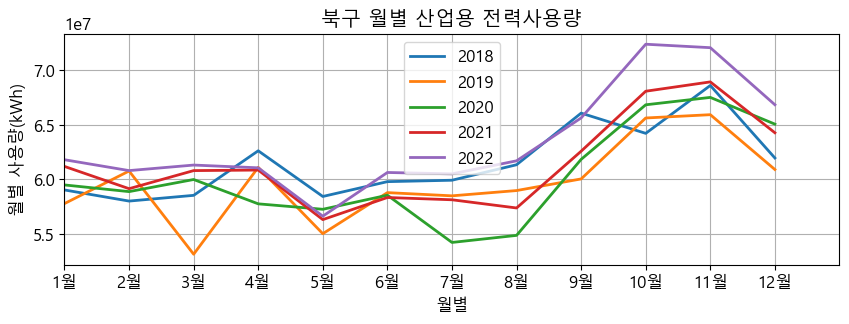

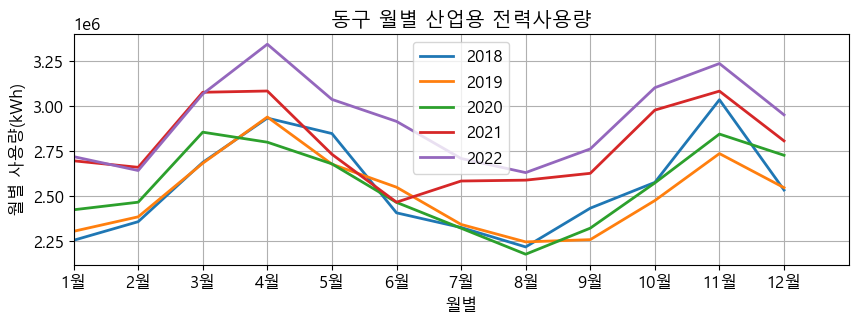

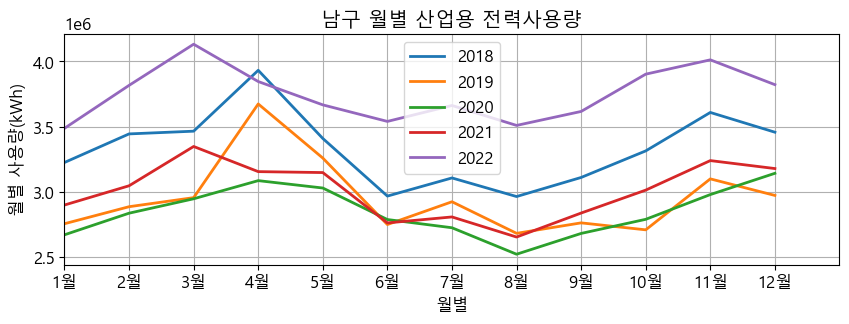

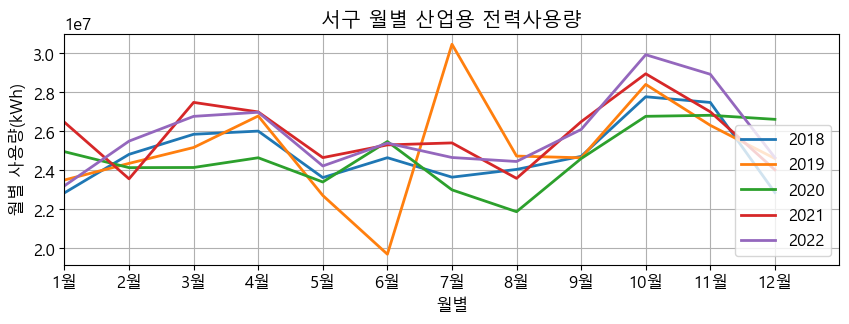

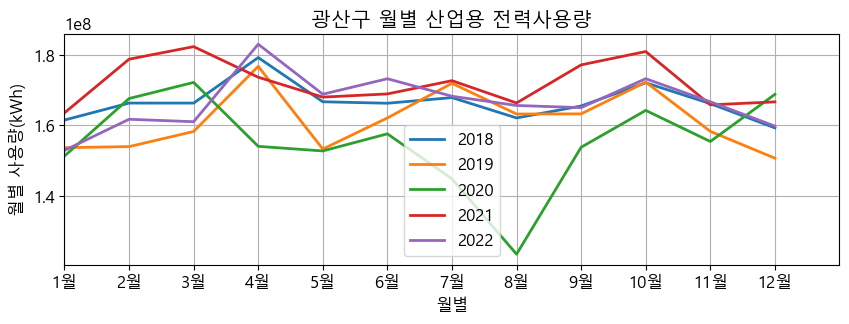

In [22]:
# 산업용
ind_north_df = ind_north.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '북구 월별 산업용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
ind_north_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

ind_east_df = ind_east.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '동구 월별 산업용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
ind_east_df.plot(ax=ax, lw=2, label='East')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()


ind_south_df = ind_south.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '남구 월별 산업용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
ind_south_df.plot(ax=ax, lw=2, label='South')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

ind_west_df = ind_west.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '서구 월별 산업용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
ind_west_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()


ind_gwang_df = ind_gwang.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '광산구 월별 산업용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
ind_gwang_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

plt.show()

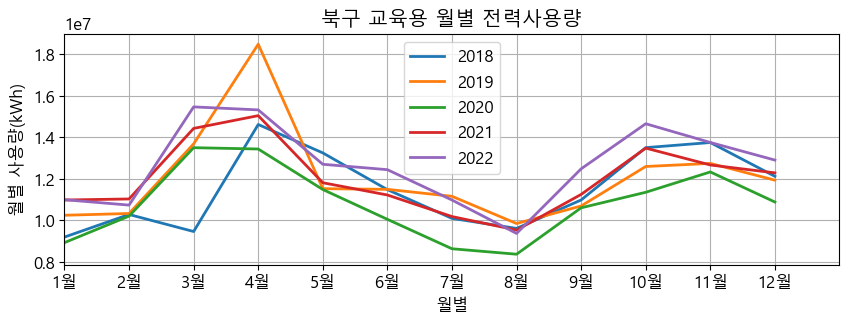

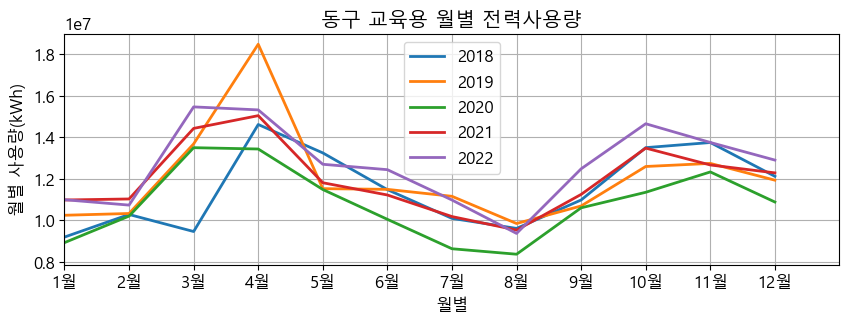

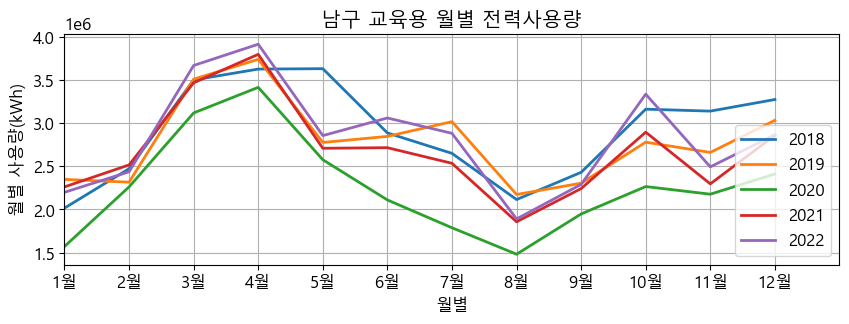

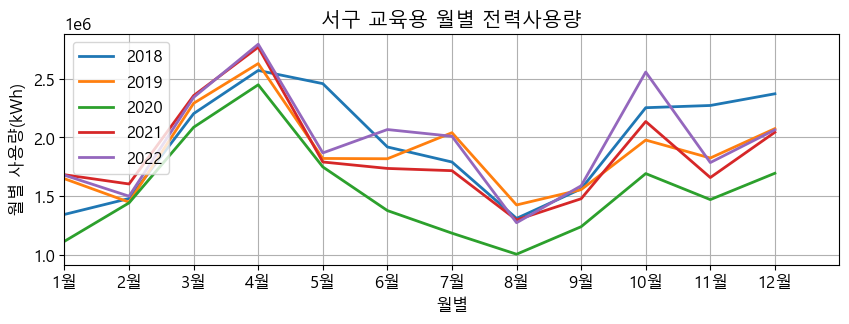

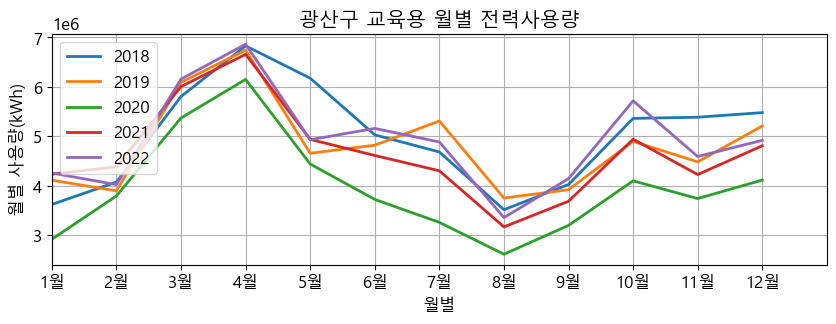

In [23]:
# 교육용
edu_north_df = edu_north.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '북구 교육용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
edu_north_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

edu_east_df = edu_north.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '동구 교육용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
edu_east_df.plot(ax=ax, lw=2, label='East')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()


edu_south_df = edu_south.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '남구 교육용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
edu_south_df.plot(ax=ax, lw=2, label='South')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

edu_west_df = edu_west.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '서구 교육용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
edu_west_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()


edu_gwang_df = edu_gwang.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '광산구 교육용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
edu_gwang_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()


plt.show()

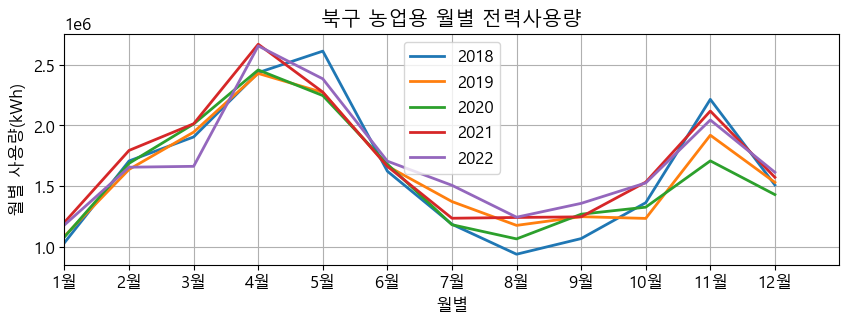

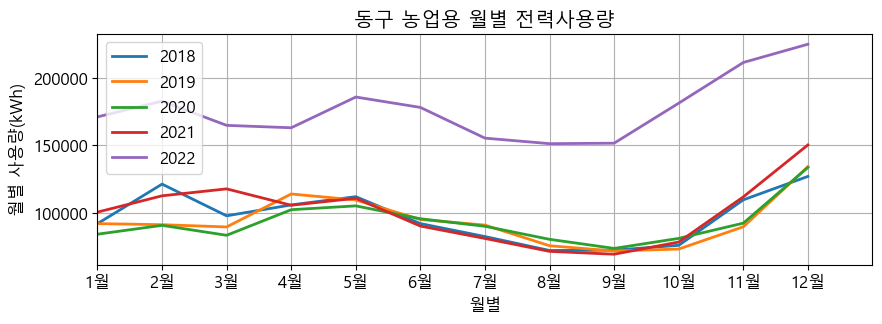

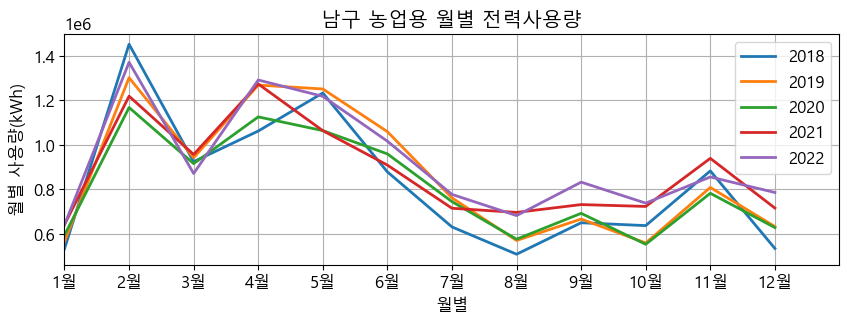

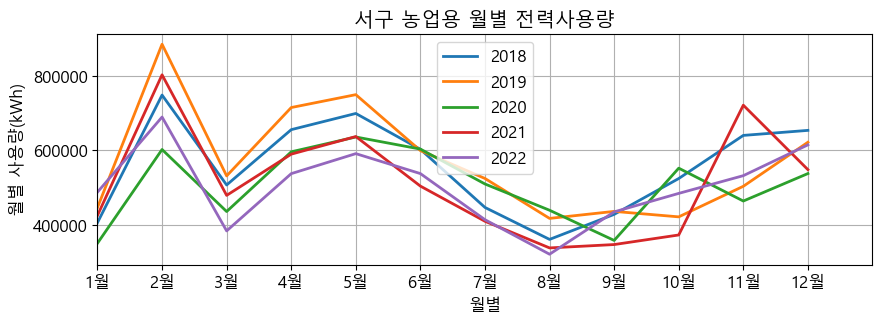

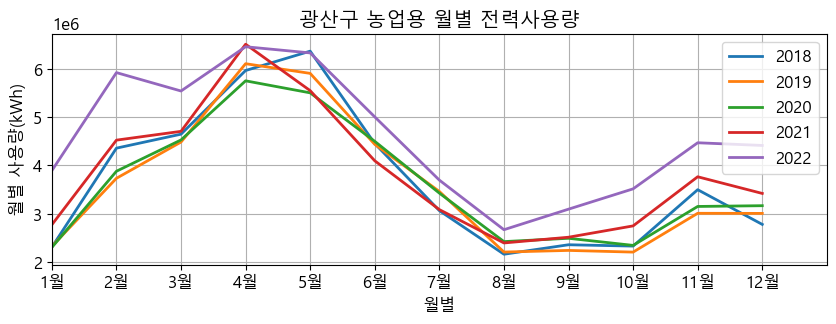

In [24]:
# 농업용
farm_north_df = farm_north.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '북구 농업용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
farm_north_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

farm_east_df = farm_east.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '동구 농업용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
farm_east_df.plot(ax=ax, lw=2, label='East')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()


farm_south_df = farm_south.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '남구 농업용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
farm_south_df.plot(ax=ax, lw=2, label='South')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12) 
ax.set_xticks(range(0, 12))
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

farm_west_df = farm_west.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '서구 농업용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
farm_west_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12) 
ax.set_xticks(range(0, 12))
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

farm_gwang_df = farm_gwang.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '광산구 농업용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
farm_gwang_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

plt.show()

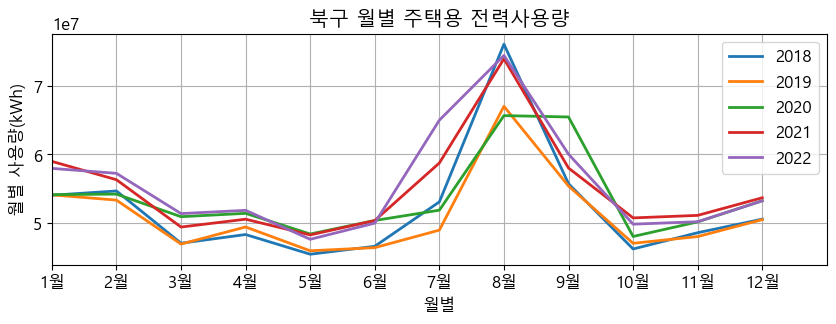

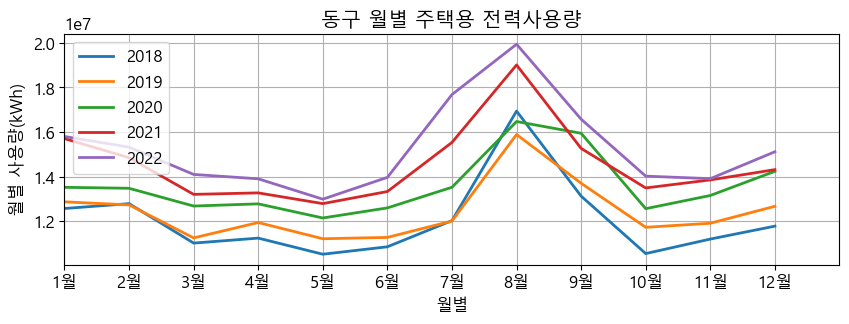

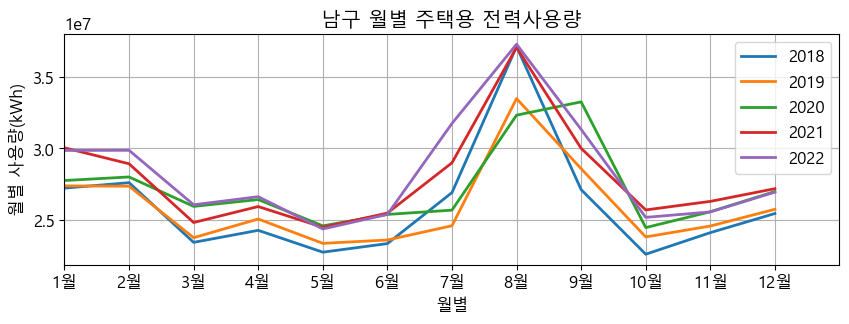

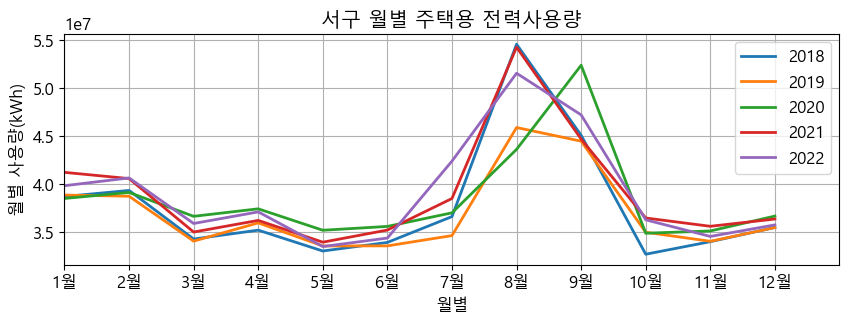

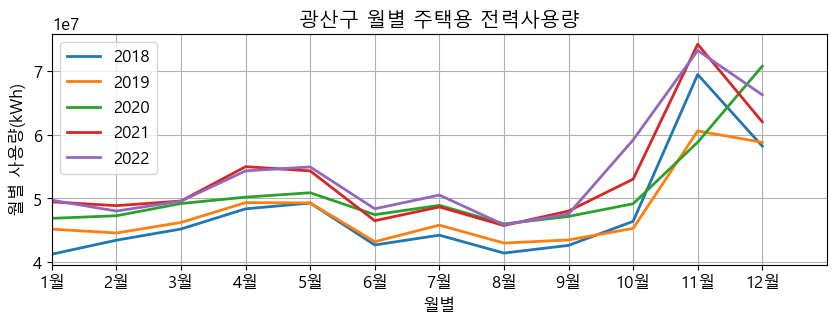

In [25]:
# 주택용
import matplotlib.pyplot as plt
h_north_df = h_north.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '북구 월별 주택용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
h_north_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)
ax.set_xticks(range(0, 12))
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

h_east_df = h_east.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '동구 월별 주택용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
h_east_df.plot(ax=ax, lw=2, label='East')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12) 
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()


h_south_df = h_south.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '남구 월별 주택용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
h_south_df.plot(ax=ax, lw=2, label='South')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12) 
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

h_west_df = h_west.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '서구 월별 주택용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
h_west_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12) 
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()

h_gwang_df = h_gwang.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '광산구 월별 주택용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
h_gwang_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=12)  
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=0)
plt.grid()
plt.show()

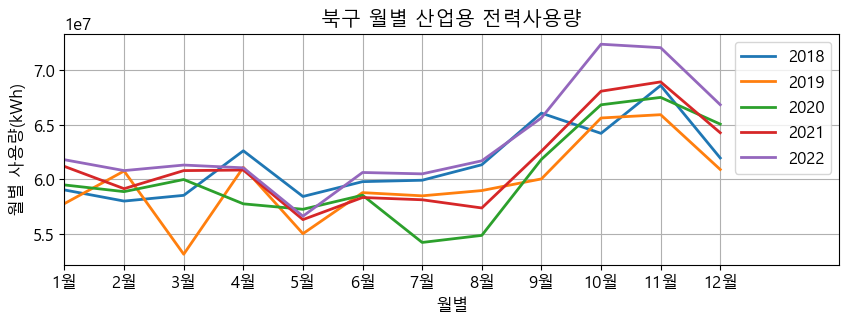

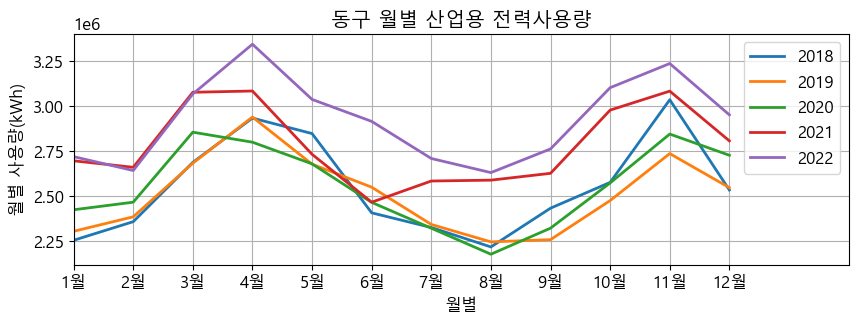

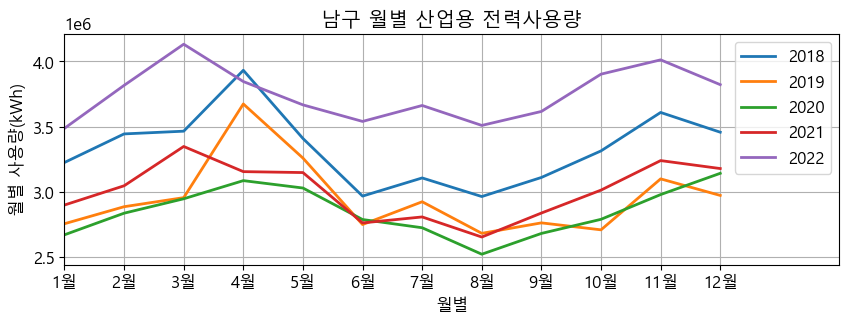

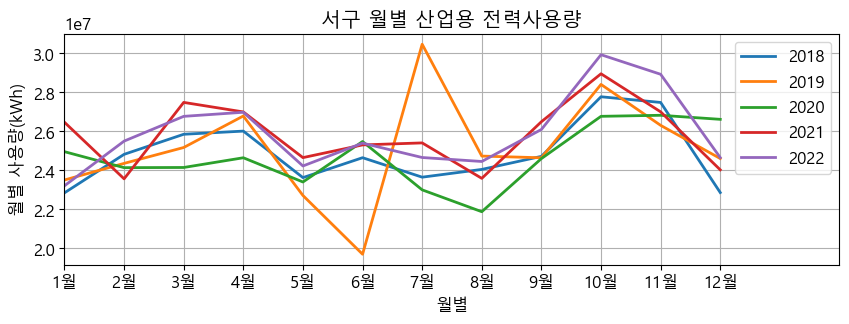

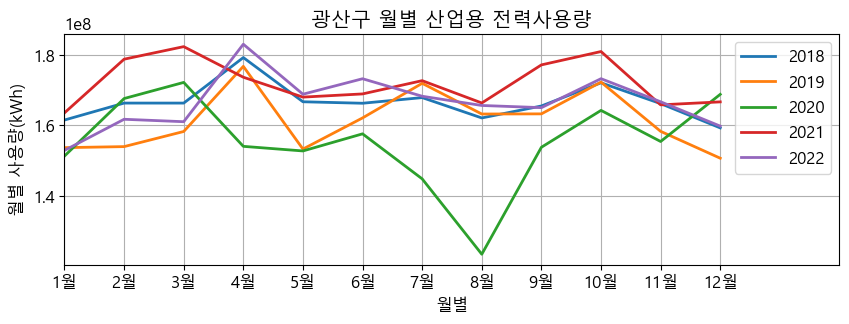

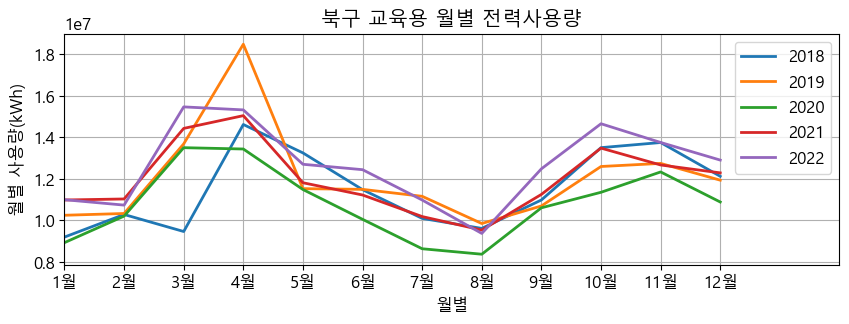

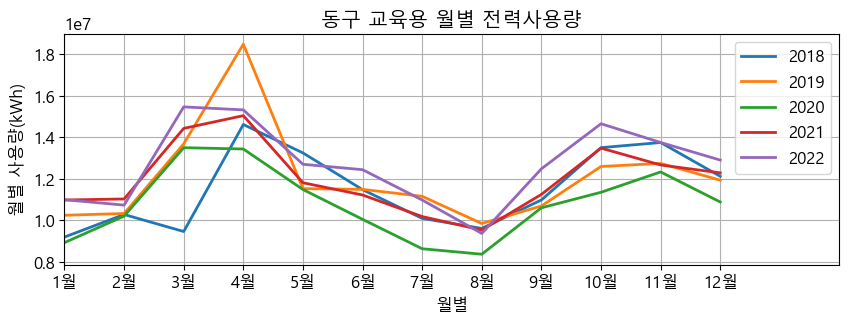

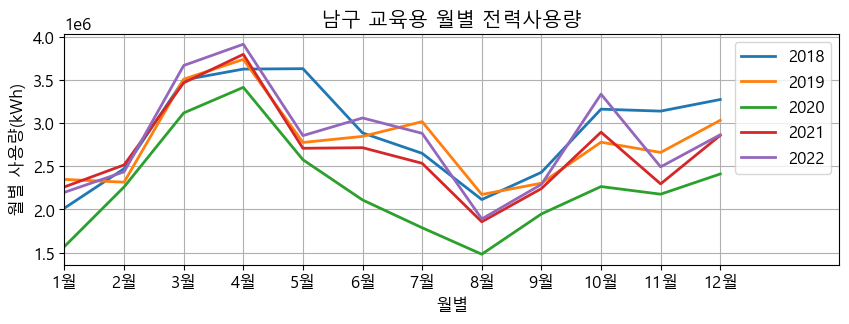

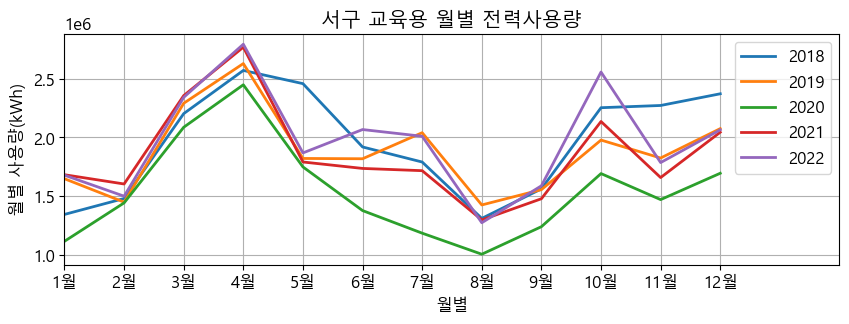

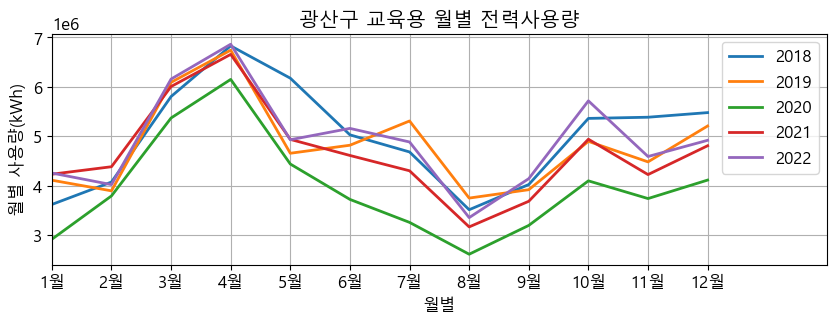

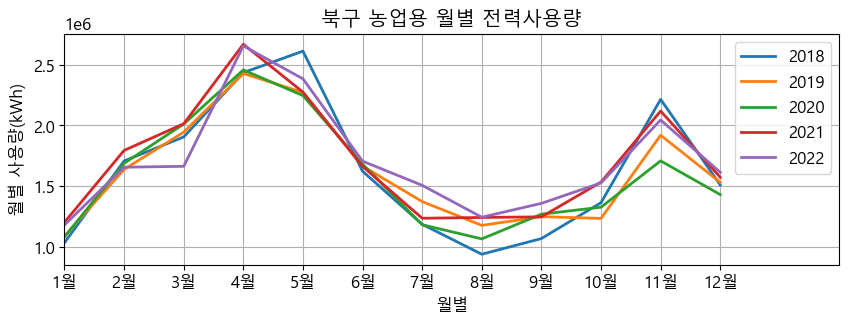

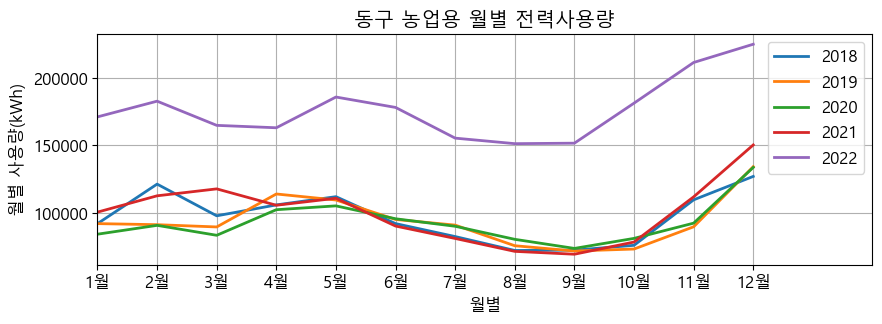

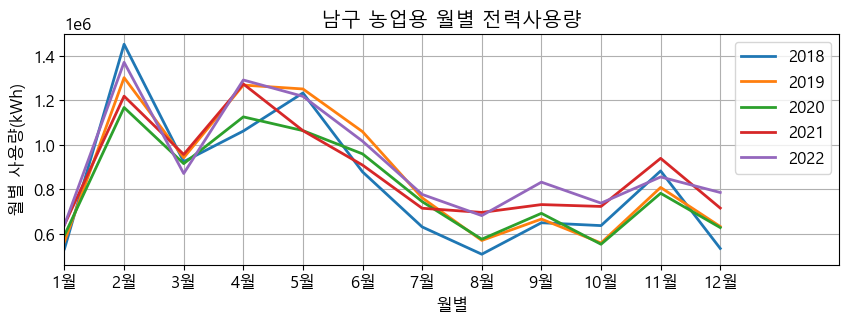

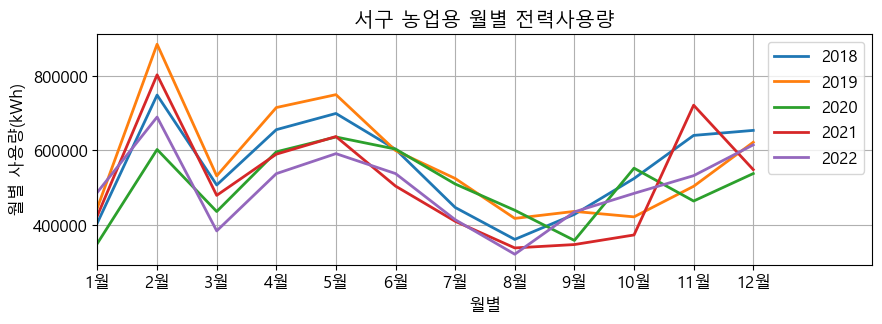

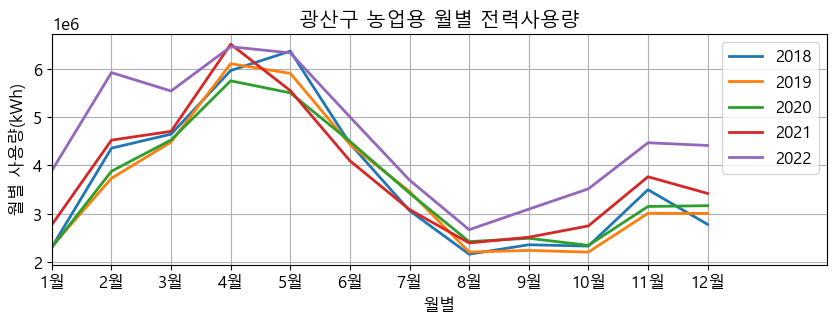

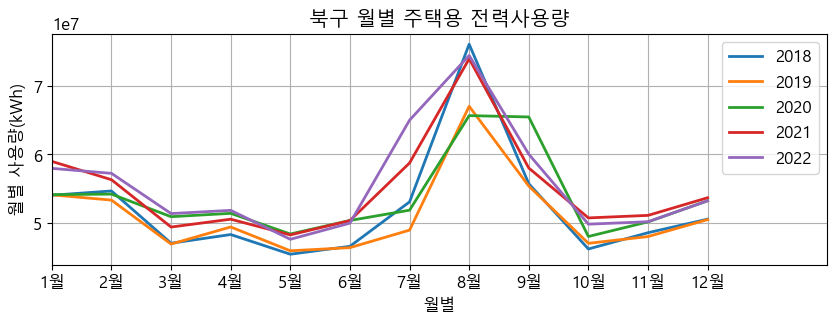

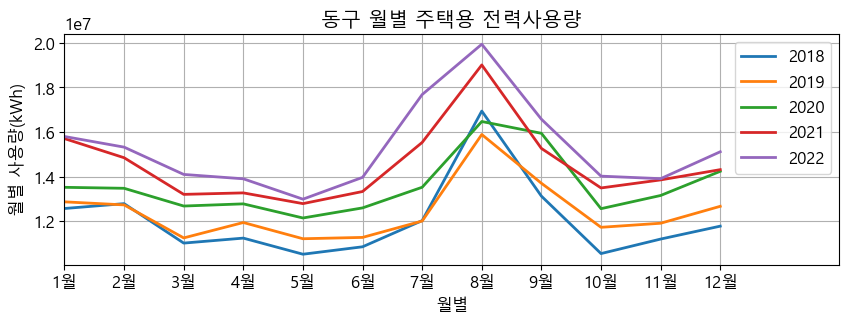

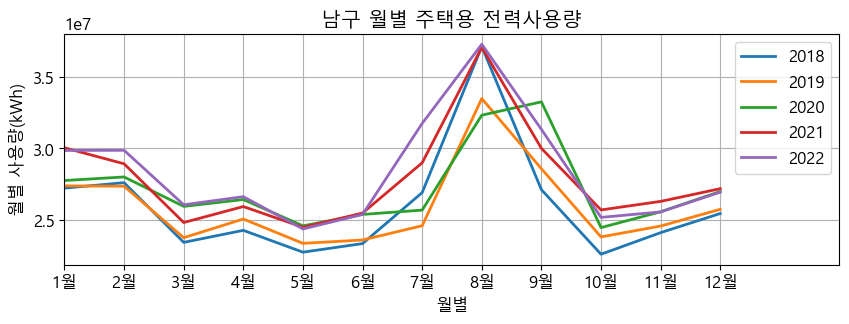

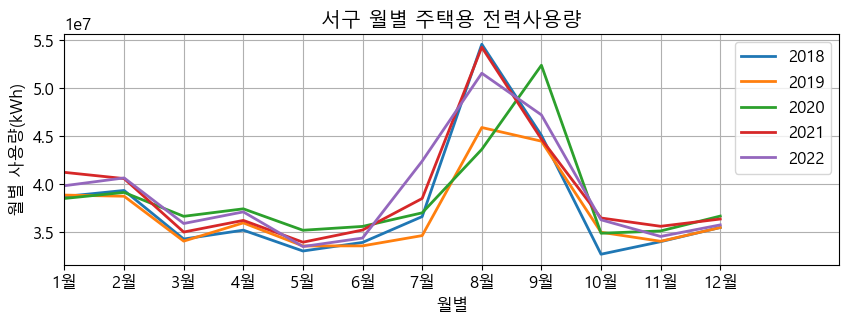

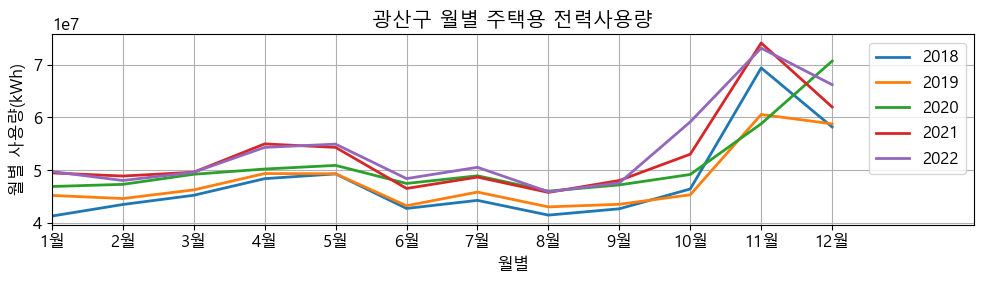

In [27]:
# 산업용
ind_north_df = ind_north.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '북구 월별 산업용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
ind_north_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

ind_east_df = ind_east.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '동구 월별 산업용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
ind_east_df.plot(ax=ax, lw=2, label='East')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()


ind_south_df = ind_south.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '남구 월별 산업용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
ind_south_df.plot(ax=ax, lw=2, label='South')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

ind_west_df = ind_west.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '서구 월별 산업용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
ind_west_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()


ind_gwang_df = ind_gwang.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '광산구 월별 산업용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
ind_gwang_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

# 교육용
edu_north_df = edu_north.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '북구 교육용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
edu_north_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

edu_east_df = edu_north.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '동구 교육용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
edu_east_df.plot(ax=ax, lw=2, label='East')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()


edu_south_df = edu_south.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '남구 교육용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
edu_south_df.plot(ax=ax, lw=2, label='South')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

edu_west_df = edu_west.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '서구 교육용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
edu_west_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()


edu_gwang_df = edu_gwang.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '광산구 교육용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
edu_gwang_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  # set x-axis limit to display only first 12 months
ax.set_xticks(range(0, 12))  # set ticks for 12 months
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()


# 농업용
farm_north_df = farm_north.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '북구 농업용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
farm_north_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

farm_east_df = farm_east.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '동구 농업용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
farm_east_df.plot(ax=ax, lw=2, label='East')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()


farm_south_df = farm_south.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '남구 농업용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
farm_south_df.plot(ax=ax, lw=2, label='South')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13) 
ax.set_xticks(range(0, 12))
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

farm_west_df = farm_west.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '서구 농업용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
farm_west_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13) 
ax.set_xticks(range(0, 12))
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

farm_gwang_df = farm_gwang.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '광산구 농업용 월별 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
farm_gwang_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

# 주택용
import matplotlib.pyplot as plt
h_north_df = h_north.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '북구 월별 주택용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
h_north_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)
ax.set_xticks(range(0, 12))
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

h_east_df = h_east.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '동구 월별 주택용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
h_east_df.plot(ax=ax, lw=2, label='East')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13) 
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()


h_south_df = h_south.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '남구 월별 주택용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
h_south_df.plot(ax=ax, lw=2, label='South')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13) 
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

h_west_df = h_west.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '서구 월별 주택용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
h_west_df.plot(ax=ax, lw=2, label='West')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13) 
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()

h_gwang_df = h_gwang.pivot_table(index='월별',columns='연도',values='전력사용량')

title = '광산구 월별 주택용 전력사용량'
ylabel = '월별 사용량(kWh)'
xlabel = '월별'

fig, ax = plt.subplots(figsize=(10, 3))
h_gwang_df.plot(ax=ax, lw=2, label='North')

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_xlim(left=1, right=13)  
ax.set_xticks(range(0, 12)) 
ax.set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
ax.legend(loc=1)
plt.grid()
plt.tight_layout()
plt.show()

